# Processing Science Images
## <font color=purple> Bias and Dark: Written by Maria Funcich



In [1]:
import numpy as np
import astropy
import ccdproc
from ccdproc import CCDData, combiner
from astropy import units as u
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

# Bias

### <font color=purple> $\star$ Collecting and Loading the Bias frames 

In [2]:
# creating image list
images = ccdproc.ImageFileCollection(".")

# filtering the Bias images and adding them to a list 'bias_img'
##print(images.files_filtered(PICTTYPE = 2))
bias_img = (images.files_filtered(PICTTYPE = 2))

# printing list of the bias images
print("List of Bias Images")
for fn in bias_img:
    print(fn)
    
# reading the bias frames in ADU and defining them into list 'biases'
biases = [CCDData.read(fn, unit = "adu") for fn in bias_img]

List of Bias Images
Bias_-4.82C_00001658.fit
Bias_-4.82C_00001663.fit
Bias_-4.82C_00001667.fit
Bias_-4.82C_00001670.fit
Bias_-4.82C_00001671.fit
Bias_-4.82C_00001672.fit
Bias_-4.82C_00001675.fit
Bias_-4.82C_00001676.fit
Bias_-4.82C_00001677.fit
Bias_-4.82C_00001678.fit
Bias_-4.82C_00001679.fit
Bias_-4.82C_00001681.fit
Bias_-4.82C_00001682.fit
Bias_-4.82C_00001683.fit
Bias_-4.82C_00001684.fit
Bias_-4.82C_00001688.fit
Bias_-4.82C_00001691.fit
Bias_-4.82C_00001692.fit
Bias_-4.82C_00001722.fit
Bias_-4.82C_00001723.fit
Bias_-4.82C_00001724.fit
Bias_-4.82C_00001725.fit
Bias_-4.82C_00001726.fit
Bias_-4.82C_00001727.fit
Bias_-4.82C_00001728.fit
Bias_-4.82C_00001729.fit
Bias_-4.82C_00001730.fit
Bias_-4.82C_00001731.fit


### <font color=purple> $\star$ Checking individual Bias Frames
<font color=purple> Checking each bias frame in DS9: <br>
In terminal: "ds9 -zscale Bias_* &"
    
- First check is to identify if they are all bias frames. This is true
- All frames appear to have more light coming in from the left side of the image
- Checking through our science images, I can see the same trend occuring therefore the bias frames are useable

#### <font color=purple> Checking the statisitics for the first frame
<font color=purple>

In [3]:
print("Pixel Value (ADU): All Bias Images", "\n", biases, "\n") # prints list of pixel values for all the bias images
print("Pixel Value (ADU): First Bias Image", "\n", biases[0], "\n") # prints the pixel values of the first bias image 
print("Pixel Value (ADU): First Bias Image, First Column:", "\n", biases[0][:,0], "\n") # print the counts of the first column of the first bias image

Pixel Value (ADU): All Bias Images 
 [CCDData([[141, 147, 134, ..., 111, 110, 120],
         [128, 135, 135, ..., 115, 107, 104],
         [135, 122, 122, ..., 105, 110, 114],
         ...,
         [142, 139, 135, ..., 114, 111, 110],
         [133, 144, 134, ..., 105, 101, 105],
         [135, 124, 138, ..., 105, 106, 105]]), CCDData([[144, 134, 143, ..., 107, 100, 108],
         [137, 145, 143, ..., 105, 110, 109],
         [134, 134, 139, ..., 112, 109, 101],
         ...,
         [137, 127, 134, ..., 105, 110, 103],
         [135, 135, 135, ..., 115,  99, 113],
         [132, 136, 136, ..., 116, 116, 107]]), CCDData([[121, 133, 134, ..., 104, 102, 115],
         [130, 136, 120, ..., 116,  99,  97],
         [132, 132, 118, ..., 104, 102, 100],
         ...,
         [126, 132, 131, ..., 105, 101, 110],
         [137, 123, 122, ..., 107,  99, 101],
         [119, 126, 130, ..., 102,  97,  98]]), CCDData([[130, 134, 139, ..., 103,  94,  99],
         [127, 128, 134, ...,  97, 106, 

<font color=purple> Counts in ADU are quite small, not a lot of read out noise coming from the camera (compared to C14).
From checking the first image, we can see that the counts are pretty much consistent.

#### <font color=purple> Minimum, Maximum, Mean pixel counts in ADU as well as the Standard deviation

In [4]:
#Prints the min(ADU), max(ADU), mean(ADU) and standard deviation for the counts in the first bias image
print('Min:', np.min(biases[0]))
print('Max:', np.max(biases[0]))
print('Mean:', np.mean(biases[0]))
print('Standard Deviation:', np.std(biases[0]))

Min: 80
Max: 554
Mean: 112.72491862104319
Standard Deviation: 9.21282954487407


<font color=purple> Standard

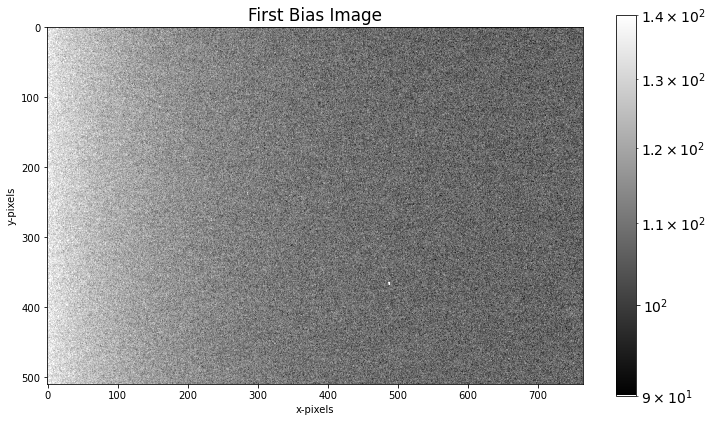

In [5]:
# displaying the first bias image
fig, ax = plt.subplots(figsize = (12,7))
plt.rcParams.update({'font.size':14 })

plt.imshow(biases[0], cmap='gray', norm=LogNorm(), vmin = 90, vmax = 140)

plt.xlabel('x-pixels')
plt.ylabel('y-pixels')

plt.title('First Bias Image')
plt.colorbar()

<font color=purple> **Figure 1.** First bias image. The image for the bias is expected, however, there is a bright pixel spot

<font color=purple> This appears on all the bias frames being used... This is going to subtract off from the dark, flat and science frames and therefore will affect the counts in that spot. Also notice the brightened left edge as mentioned earlier.

### <font color=purple> $\star$ Combining the Bias frames

#### <font color=purple>Checking the stats for the combined bias frame

[[135.  132.5 133.5 ... 103.5 103.5 103.5]
 [130.5 133.  132.5 ... 105.  104.  103.5]
 [132.5 134.  135.5 ... 105.  103.5 102. ]
 ...
 [126.5 130.  130.  ... 105.  104.5 104. ]
 [132.  131.5 129.5 ... 105.  101.  106.5]
 [131.  130.  129.  ... 105.  105.  104.5]]
Min: 97.0
Max: 542.5
Mean: 109.27966551326413
Standard Deviation: 6.784267733107446


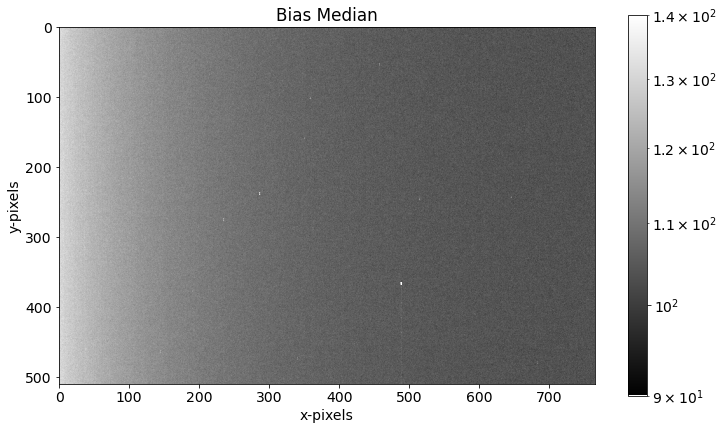

In [6]:
# combines all bias frames together
bias_median = ccdproc.Combiner(biases).median_combine()

# prints bias median counts
print(bias_median)

# prints count statistics for the bias median
print('Min:', np.min(bias_median))
print('Max:', np.max(bias_median))
print('Mean:', np.mean(bias_median))
print('Standard Deviation:', np.std(bias_median))

# displays the image for the Bias Median
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(bias_median, cmap='gray', norm=LogNorm(), vmax=140, vmin
=90)
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('Bias Median')
plt.colorbar()

<font color=purple> **Figure 2.** Bias Median. All biases have been combined. The bright pixel spot still remains. Overall, by combining the frames, the standard deviation decreases when compared to one single bias frame (as shown in **Figure 1**).

### <font color=purple> $\star$ Creating Bias median frame

In [7]:
# header for bias median frame
bias_median.meta.update(EXPTIME = 0) # "add" exposure time "to header"
bias_median.meta.update(TELESCOP = 'C11') # "" telescope ""
bias_median.meta.update(OBJECT = 'Bias_Median') # "" image(object) type ""
print(bias_median.meta)

# creating bias_median.fits file
bias_median.write("bias_median.fits")

# removes the "biases" array
del(biases)

OrderedDict([('NCOMBINE', 28), ('EXPTIME', 0), ('TELESCOP', 'C11'), ('OBJECT', 'Bias_Median')])


# Dark

### <font color=purple> $\star$ Collecting and Loading the Dark frames 

In [8]:
# creating image list
images = ccdproc.ImageFileCollection(".",glob_include = 'Dark_600*')

print("List of Dark Frames")
for fn in images.files_filtered(PICTTYPE = 3):
    print(fn)

# filter darks, reading the dark frames in ADU and defining them into list 'darks'
darks = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 3)]

List of Dark Frames
Dark_600.000secs_-5.23C_00002340.fit
Dark_600.000secs_-5.23C_00002341.fit
Dark_600.000secs_-5.23C_00002342.fit
Dark_600.000secs_-5.23C_00002345.fit
Dark_600.000secs_-5.23C_00002346.fit
Dark_600.000secs_-5.23C_00002347.fit
Dark_600.000secs_-5.23C_00002349.fit
Dark_600.000secs_-5.23C_00002351.fit
Dark_600.000secs_-5.23C_00002353.fit
Dark_600.000secs_-5.23C_00002354.fit
Dark_600.000secs_-5.23C_00002355.fit
Dark_600.000secs_-5.23C_00002359.fit
Dark_600.000secs_-5.23C_00002360.fit
Dark_600.000secs_-5.23C_00002365.fit
Dark_600.000secs_-5.23C_00002367.fit
Dark_600.000secs_-5.23C_00002368.fit
Dark_600.000secs_-5.23C_00002369.fit
Dark_600.000secs_-5.23C_00002371.fit
Dark_600.000secs_-5.23C_00002377.fit
Dark_600.000secs_-5.23C_00002380.fit


### <font color=purple> $\star$ Checking individual Dark Frames

<font color=purple> Checking each dark frame in DS9 <br>
In terminal: "ds9 -zscale Dark_* &"
- First check is to identify if they are all dark frames. This is true
- All frames appear to have more light coming in from the left side of the images (this occured with the bias images as well), dark frames are useable

#### <font color=purple> NOTE the Temperature!
<font color=purple> Science images and darks should have the same temperature within 0.5 degrees
- all Darks have the same temperature and exposure time

In [9]:
# displaying exposure time and temperature of the first dark frame
print("Exposure time of Darks: ", darks[0].header['EXPTIME'], "\n", "   Temperature of CCD: ", darks[0].header['CCD-TEMP'])

Exposure time of Darks:  600.0 
    Temperature of CCD:  -5.23215684598954


#### <font color=purple> Checking the statisitics for the first frame
<font color=purple>

Pixel Value (ADU): All Dark Images 
 [CCDData([[145, 140, 145, ..., 111, 111, 120],
         [150, 141, 151, ..., 119, 117, 156],
         [132, 134, 153, ..., 117, 112, 124],
         ...,
         [186, 133, 146, ..., 113, 121, 114],
         [134, 139, 141, ..., 112, 117, 125],
         [154, 143, 143, ..., 119, 116, 118]]), CCDData([[133, 141, 135, ..., 119, 117, 109],
         [132, 143, 147, ..., 112, 109, 151],
         [138, 145, 137, ..., 112,  99, 101],
         ...,
         [188, 138, 129, ..., 130, 107, 104],
         [146, 143, 141, ..., 121, 109, 118],
         [122, 139, 132, ..., 113, 119, 109]]), CCDData([[130, 130, 132, ...,  97, 112, 111],
         [129, 124, 121, ..., 100, 107, 134],
         [122, 130, 133, ...,  94,  98, 106],
         ...,
         [170, 128, 144, ..., 111, 102, 109],
         [133, 145, 118, ..., 110, 115, 105],
         [140, 137, 125, ..., 114, 113, 112]]), CCDData([[138, 135, 142, ..., 109,  98, 102],
         [135, 132, 126, ..., 106, 101, 

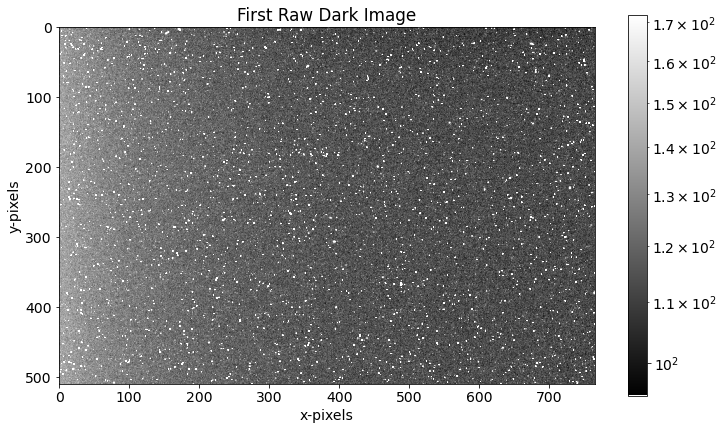

In [10]:
print("Pixel Value (ADU): All Dark Images", "\n", darks, "\n") # prints list of pixel values for all the dark frames
print("Pixel Value (ADU): First Dark Image", "\n", darks[0], "\n") # prints the pixel values of the first dark frames
print("Pixel Value (ADU): First Dark Image, First Column:", "\n", darks[0][:,0], "\n") # print the counts of the first column of the first dark frames

# stats for first frame
print('Min:', np.min(darks[0]))
print('Max:', np.max(darks[0]))
print('Mean:', np.mean(darks[0]))
print('Standard Deviation:', np.std(darks[0]))

#Displays the image for the first dark image
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(darks[1], cmap='gray', norm=LogNorm(), vmin = 95, vmax =172)
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('First Raw Dark Image')
plt.colorbar()

<font color=purple> **Figure 3.** First Raw Dark Image.
Minimum value of counts is 83 adu and max is 54958 adu, varius hot pixels can be seen scattered about in the
image, this therefore will give a large standard deviation. In this case our std is 215 which is high. This
likely means there was a lot of random noise when the exposure was taken.

### <font color=purple> $\star$ Subtracting the Bias from all the indiviual Dark exposures

In [11]:
# for loop which goes through each of the "darks" images and subtracts the value of the "bias_median"
for idx, thisimage in enumerate(darks): 
    darks[idx] = ccdproc.subtract_bias(thisimage, bias_median)

#### <font color=purple> Checking the statisitics for the first bias subtracted dark frame
<font color=purple>

Pixel Value (ADU): All Dark Images 
 [[10.   7.5 11.5 ...  7.5  7.5 16.5]
 [19.5  8.  18.5 ... 14.  13.  52.5]
 [-0.5  0.  17.5 ... 12.   8.5 22. ]
 ...
 [59.5  3.  16.  ...  8.  16.5 10. ]
 [ 2.   7.5 11.5 ...  7.  16.  18.5]
 [23.  13.  14.  ... 14.  11.  13.5]] 

Min: -88.0
Max: 54415.5
Mean: 16.343112905292838
Standard Deviation: 214.62105473397972


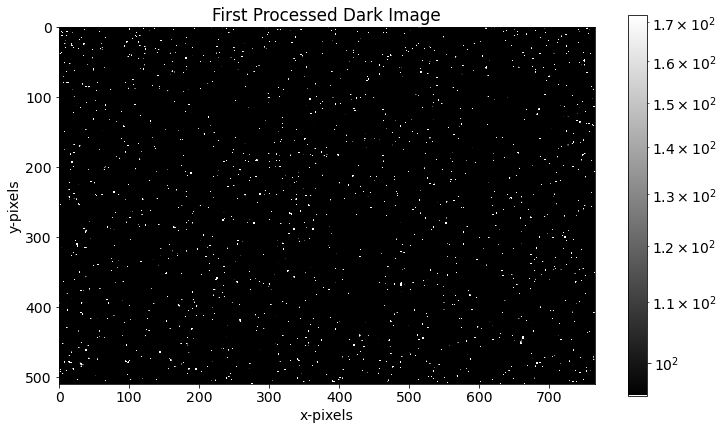

In [12]:
# Prints out the list (array) of pixel values for processed dark
print("Pixel Value (ADU): All Dark Images", "\n", darks[0], "\n")


#Prints the statistic counts for first processed dark frame (min, max, mean and standard deviation)
print('Min:', np.min(darks[0]))
print('Max:', np.max(darks[0]))
print('Mean:', np.mean(darks[0]))
print('Standard Deviation:', np.std(darks[0]))

#Displays the image for the first dark frame
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(darks[0], cmap='gray', norm=LogNorm(),vmin = 95, vmax =172)
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('First Processed Dark Image')
plt.colorbar()

<font color=purple> **Figure 4.** By subtracting the Bias Median from the First Dark, we can see a decrease in pixel count.
    
- Mean count was ~120 ADU, this dropped to ~16 ADU after bias median count was subtracted off (a decrease in ~ 109 ADU). Hence why the pixels (image) are a lot darker in figure 4 when compared to figure 3.

#### <font color=purple>Checking if it was successful by printing the stats for all the processed darks

In [13]:
print("Pixel Value (ADU): All Processed Dark Images", "\n", darks, "\n") # prints list of pixel values for all the processed dark frames

Pixel Value (ADU): All Processed Dark Images 
 [CCDData([[10. ,  7.5, 11.5, ...,  7.5,  7.5, 16.5],
         [19.5,  8. , 18.5, ..., 14. , 13. , 52.5],
         [-0.5,  0. , 17.5, ..., 12. ,  8.5, 22. ],
         ...,
         [59.5,  3. , 16. , ...,  8. , 16.5, 10. ],
         [ 2. ,  7.5, 11.5, ...,  7. , 16. , 18.5],
         [23. , 13. , 14. , ..., 14. , 11. , 13.5]]), CCDData([[-2. ,  8.5,  1.5, ..., 15.5, 13.5,  5.5],
         [ 1.5, 10. , 14.5, ...,  7. ,  5. , 47.5],
         [ 5.5, 11. ,  1.5, ...,  7. , -4.5, -1. ],
         ...,
         [61.5,  8. , -1. , ..., 25. ,  2.5,  0. ],
         [14. , 11.5, 11.5, ..., 16. ,  8. , 11.5],
         [-9. ,  9. ,  3. , ...,  8. , 14. ,  4.5]]), CCDData([[ -5. ,  -2.5,  -1.5, ...,  -6.5,   8.5,   7.5],
         [ -1.5,  -9. , -11.5, ...,  -5. ,   3. ,  30.5],
         [-10.5,  -4. ,  -2.5, ..., -11. ,  -5.5,   4. ],
         ...,
         [ 43.5,  -2. ,  14. , ...,   6. ,  -2.5,   5. ],
         [  1. ,  13.5, -11.5, ...,   5. ,  14. , 

<font color=purple> Counts are all pretty much consistent with the first frame
- Some are close to 0 counts as expected
- The pixels with greater counts in ADU are most likely from the hot pixels and cosmic rays

### <font color=purple> $\star$ Combining the processed Dark exposures

In [14]:
# combines the median dark value images together
dark_median = ccdproc.Combiner(darks).median_combine()

#### <font color=purple>Checking stats

Pixel Value (ADU): Dark Median 
 [[ 0.   6.   5.  ...  5.5  5.   8.5]
 [ 5.   1.   0.5 ...  3.   4.  39.5]
 [ 3.   2.5 -1.  ...  2.5  3.5  3. ]
 ...
 [55.5  4.5  7.  ...  6.   7.   5.5]
 [ 8.   6.   8.5 ...  6.5 11.5  4.5]
 [ 6.   8.5  5.  ...  7.   5.5  8.5]] 

Min: -77.0
Max: 54417.0
Mean: 12.463223119313085
Standard Deviation: 213.09233951134513


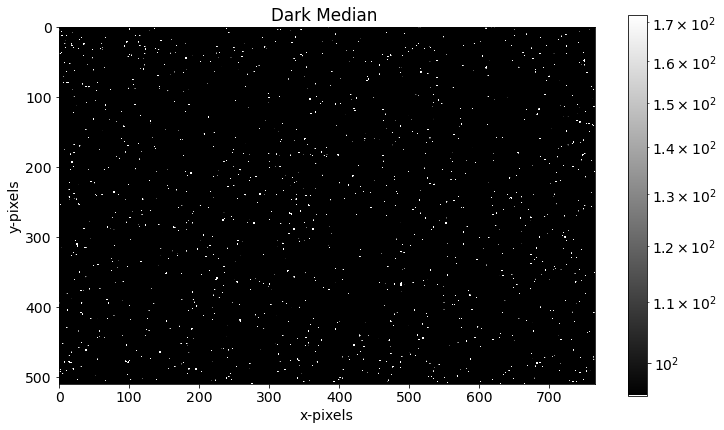

In [15]:
# Prints out the list (array) of pixel values for the dark median
print("Pixel Value (ADU): Dark Median", "\n", dark_median, "\n")

#Prints the statistic counts for dark median (min, max, mean and standard deviation)
print('Min:', np.min(dark_median))
print('Max:', np.max(dark_median))
print('Mean:', np.mean(dark_median))
print('Standard Deviation:', np.std(dark_median))

#Displays the image for the dark median image
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(dark_median, cmap='gray', norm=LogNorm(), vmin = 95, vmax =172)
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('Dark Median ')
plt.colorbar()

<font color=purple> **Figure 5.** Dark Median. Final image that will subtract the outlying pixels (i.e. hot pixels) from the science images. The counts have fallen ~ 109 ADU. 
    
- Standard deviation did not change much meaning that the added combined images roughly had noise in
the same areas.

### <font color=purple> $\star$ Creating Dark median frame

In [16]:
# header for the Dark Median frame
dark_median.meta.update(EXPTIME = 600) # exposure time
dark_median.meta.update(TELESCOP = 'C11') # telescope
dark_median.meta.update(OBJECT = 'Dark_Median') # image(object) type
print(dark_median.meta)

# creating dark_median.fits file
dark_median.write("dark_median.fits")

OrderedDict([('NCOMBINE', 20), ('EXPTIME', 600), ('TELESCOP', 'C11'), ('OBJECT', 'Dark_Median')])
